In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sqlite3
%matplotlib inline
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
# from http://astro-lsst-01.astro.washington.edu:8081/
conn = sqlite3.connect('baseline_v1.5_10yrs.db')
sql = 'select altitude, azimuth, fieldRA, fieldDec from summaryallprops;'
obs = pd.read_sql(sql, conn)

# I think we need az to go +-180? 
alt = obs['altitude'].values
az = obs['azimuth'].values
az[np.where(az > 180)] = az[np.where(az > 180)] - 360

ra = obs['fieldRA'].values
dec = obs['fieldDec'].values

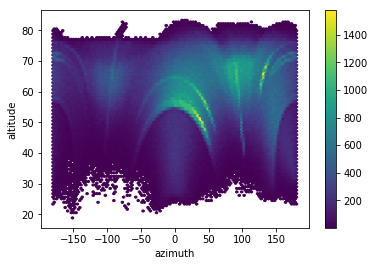

In [3]:
plt.hexbin(az, alt,  mincnt=.1)
plt.xlabel('azimuth')
plt.ylabel('altitude')
plt.colorbar()

In [4]:
val = np.abs(60. - 30.*(np.abs(az)/60.)**2-alt)
in_geo = np.where(val < 10.)[0]

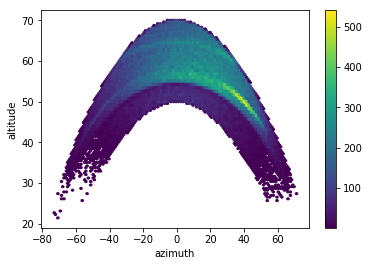

In [5]:
plt.hexbin(az[in_geo], alt[in_geo], mincnt=.1)
plt.xlabel('azimuth')
plt.ylabel('altitude')
plt.colorbar()

In [6]:
# Let's make some other coordinates
c = SkyCoord(ra=obs['fieldRA'].values*u.degree, dec=obs['fieldDec'].values*u.degree)
gal = c.galactic
eclip = c.barycentricmeanecliptic

In [7]:
in_low_eclip = np.where(np.abs(eclip.lat) < 10.*u.degree)[0]
in_low_gal = np.where(np.abs(gal.b) < 10.*u.degree)[0]

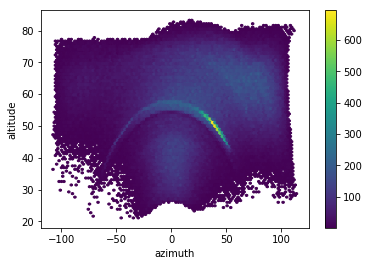

In [8]:
plt.hexbin(az[in_low_eclip], alt[in_low_eclip], mincnt=.1)
plt.xlabel('azimuth')
plt.ylabel('altitude')
plt.colorbar()

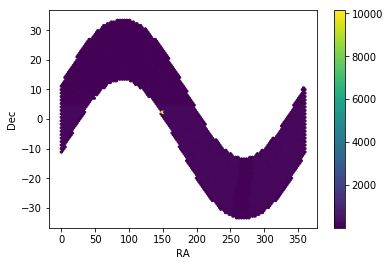

In [9]:
plt.hexbin(ra[in_low_eclip], dec[in_low_eclip], mincnt=.1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()

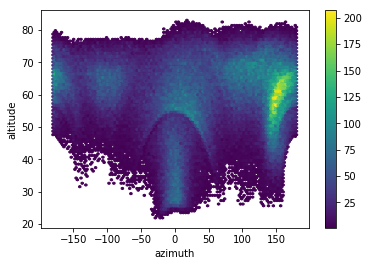

In [10]:
plt.hexbin(az[in_low_gal], alt[in_low_gal], mincnt=.1)
plt.xlabel('azimuth')
plt.ylabel('altitude')
plt.colorbar()

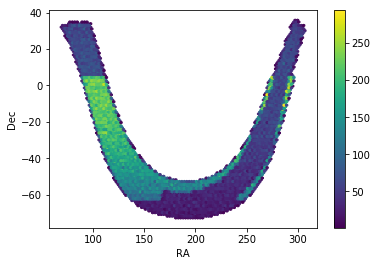

In [11]:
plt.hexbin(ra[in_low_gal], dec[in_low_gal], mincnt=.1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()

In [12]:
print('Total number of observations=%i' % alt.size)
print('Total in low eciptic= %i' % in_low_eclip.size)
print('Total in low galactic lat = %i' % in_low_gal.size)

Total number of observations=2224095
Total in low eciptic= 503399
Total in low galactic lat = 291447


In [13]:
print('Fraction in GEO region = %.3f' % (in_geo.size/alt.size))
print('Fraction in GEO and low ecliptic lat = %.3f' % (np.intersect1d(in_geo, in_low_eclip).size/alt.size))
print('Fraction in GEO and low galactic lat = %.3f' % (np.intersect1d(in_geo, in_low_gal).size/alt.size))


Fraction in GEO region = 0.199
Fraction in GEO and low ecliptic lat = 0.069
Fraction in GEO and low galactic lat = 0.019
